
## Урок 7. Практическая работа. Сравнение работы алгоритмов деревьев решений. Использование ансамблевых алгоритмов
Анализ рынка недвижимости Калифорнии с использованием ансамблевых методов
Цель задания: Использовать набор данных fetch_california_housing для построения и анализа моделей машинного обучения с акцентом на ансамблевые методы.

1. Загрузка и предварительный анализ данных:
    - Загрузите данные из предоставленного файла fetch_california_housing.xlsx.
    - Исследуйте структуру данных, проведите описательный анализ основных статистических показателей.

2. Предобработка данных:
    - Очистите данные от возможных аномалий и пропущенных значений.

3. Построение моделей:
    - Разделите данные на обучающую и тестовую выборки.
    - Постройте и обучите модели RandomForestRegressor и GradientBoostingRegressor.
    - Постарайтесь оптимизировать их гиперпараметры для улучшения результатов на обучающей выборке.

4. Оценка моделей:
    - Оцените качество моделей на тестовой выборке с использованием метрик RMSE (Root Mean Squared Error) и R² (коэффициент детерминации).
    - Сравните результаты моделей, интерпретируйте их.

5. Анализ важности признаков и выводы:
    - Используйте атрибут feature_importances_ для оценки важности признаков в каждой модели.
    - На основе полученных данных сделайте выводы о том, какие признаки наиболее значимы и почему.

6. Дополнительные задачи (для желающих углубить знания):
    - Проведите кросс-валидацию результатов.
    - Исследуйте влияние удаления некоторых признаков на производительность моделей.




### 1. Загрузка и предварительный анализ данных:

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [129]:
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['target'] = housing_data.target

In [130]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [118]:
print(df.isnull().sum())
df.info()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [119]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.87,1.90,0.50,2.56,3.53,4.74,15.00
HouseAge,20640.0,28.64,12.59,1.00,18.00,29.00,37.00,52.00
AveRooms,20640.0,5.43,2.47,0.85,4.44,5.23,6.05,141.91
AveBedrms,20640.0,1.10,0.47,0.33,1.01,1.05,1.10,34.07
Population,20640.0,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00
AveOccup,20640.0,3.07,10.39,0.69,2.43,2.82,3.28,1243.33
Latitude,20640.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95
Longitude,20640.0,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
target,20640.0,2.07,1.15,0.15,1.20,1.80,2.65,5.00


**Выводы:**
- Датасет представляет собой таблицу, содержащую 20640 записей.
- В дата сете 9 признаков. Из которых "target" является целевой переменной.
- Данные:
    - MedInc (Median Income): Медианный доход
    - HouseAge (House Age): Возраст домов
    - AveRooms (Average Rooms): Среднее количество комнат
    - AveBedrms (Average Bedrooms): Среднее количество спален
    - Population: Население
    - AveOccup (Average Occupancy): Средняя занятость жилья
    - Latitude: Широта местоположения
    - Longitude: Долгота местоположения
    - target: Целевая переменная, указывающая на стоимость жилья.
-  в данных нет пропущенных значений.

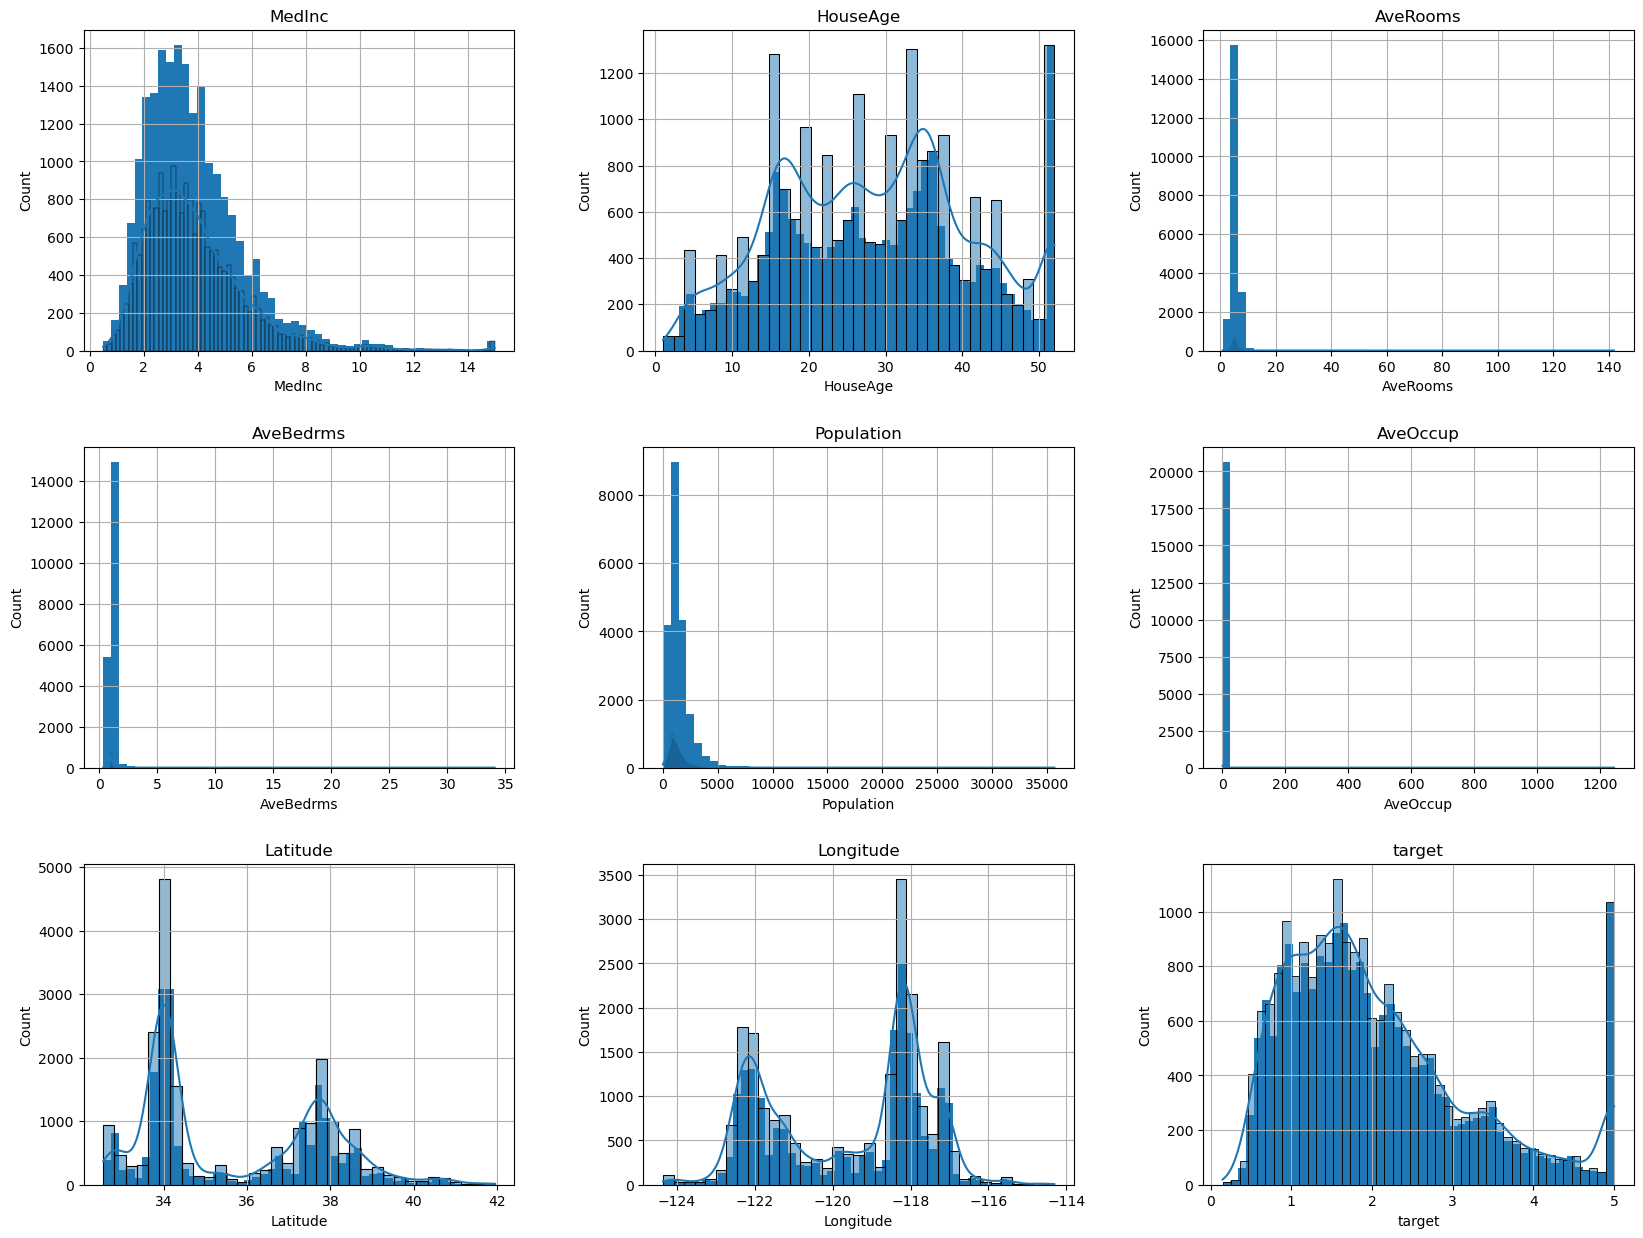

In [6]:
df.hist(bins=50, figsize=(20,15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
plt.show()

### 2. Предобработка данных:

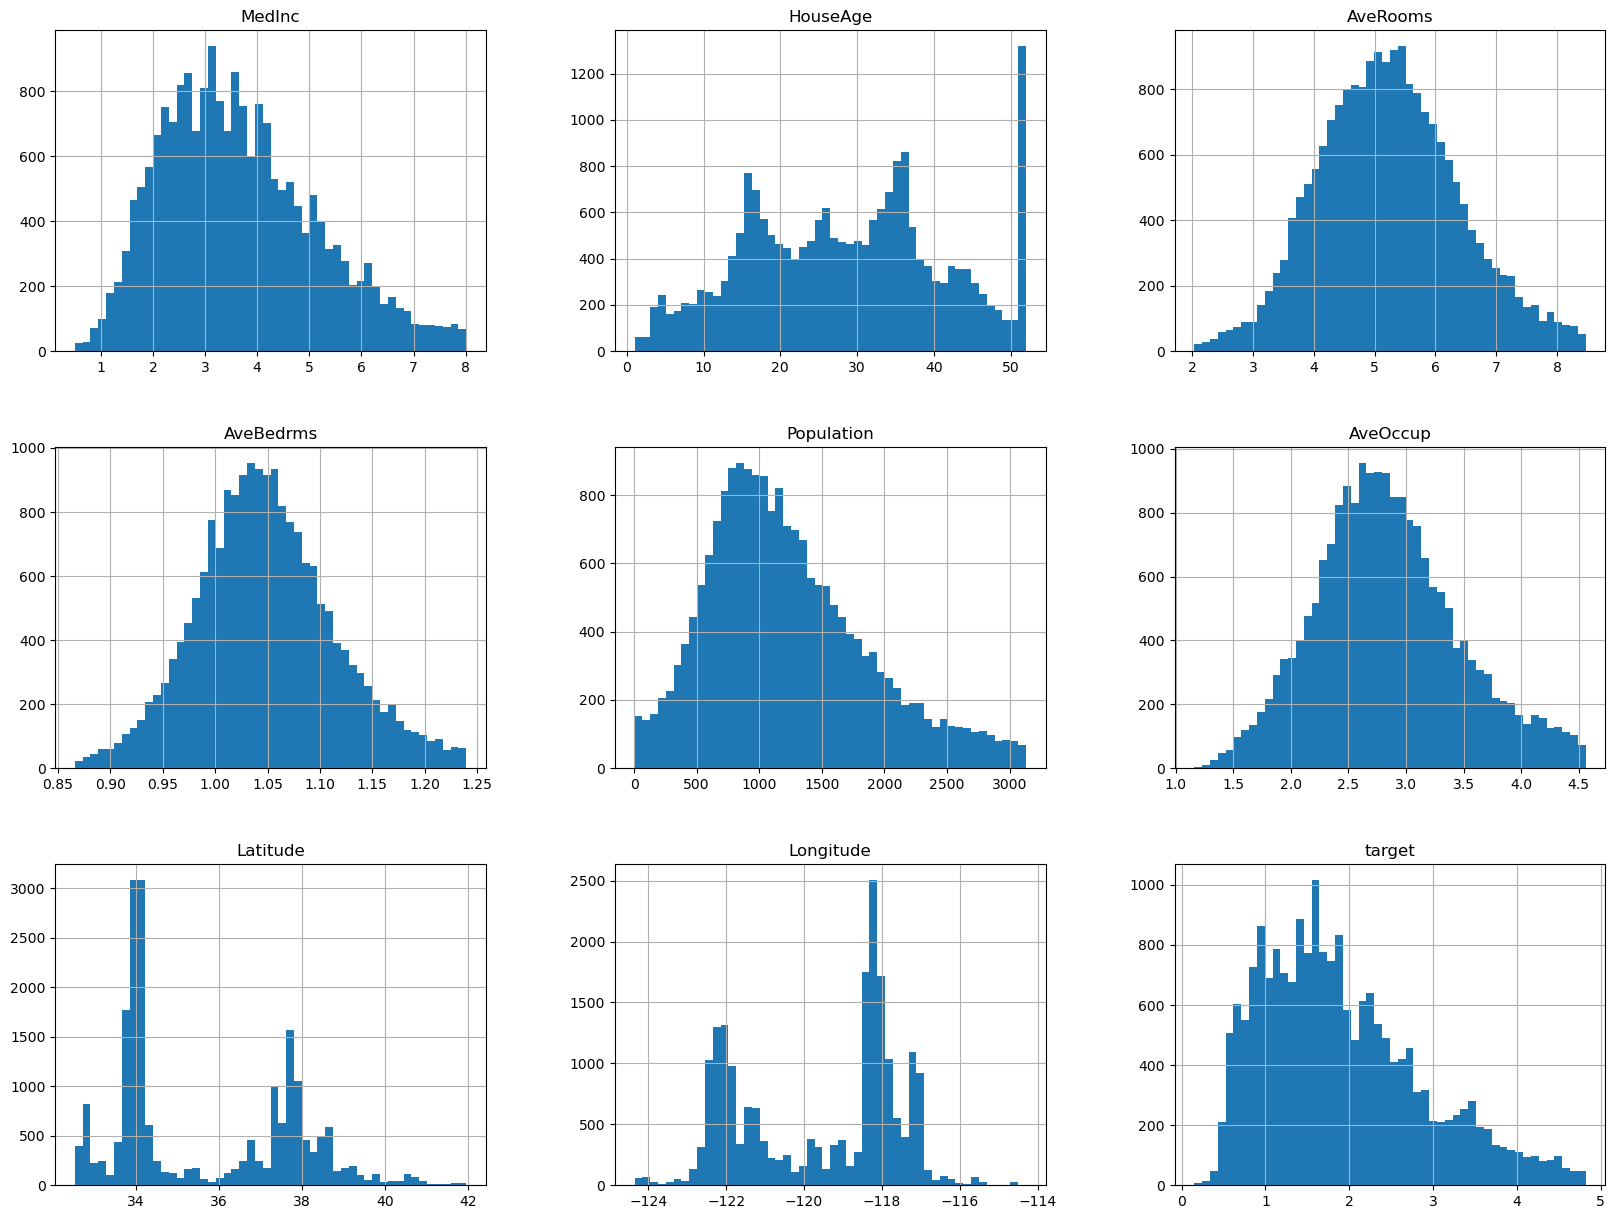

In [120]:
#Уберем выбросы
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df > (Q1 - 1.5 * IQR)) & (df < (Q3 + 1.5 * IQR))]
df_no_outliers.hist(bins=50, figsize=(20,15))
plt.show()

### 3. Построение моделей:

In [148]:
#разделим выборки
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

def train_models(X_train, y_train):
  for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Модель обучена: {name}")

train_models(X_train, y_train)


Модель обучена: Random Forest
Модель обучена: Gradient Boosting


### 4. Оценка моделей:

In [150]:
def evaluate_models(models, X_train, X_test, y_test):
  for name, model in models.items():
    y_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred)
      
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²_train: {r2_train:.3f}")
    print(f"R²_test: {r2_test:.3f}")
    print()

evaluate_models(models,X_train, X_test, y_test)

Random Forest:
RMSE: 0.505
R²_train: 0.974
R²_test: 0.805

Gradient Boosting:
RMSE: 0.542
R²_train: 0.805
R²_test: 0.776



Обе модели показали хорошо описывают зависимость между признаками и целевой переменной, коэффициент детерминации равен 0,805 и 0,776 для моделей Random Forest и Gradient Boosting соответственно. Ошибку MSE Random Forest так же выдает чуть меньшую. В модели Random Forest коэффициент детерминации для тестовой выборки меньше, чем для тренирововчной, возможно, можедь переучивается.

### 5. Анализ важности признаков и выводы:

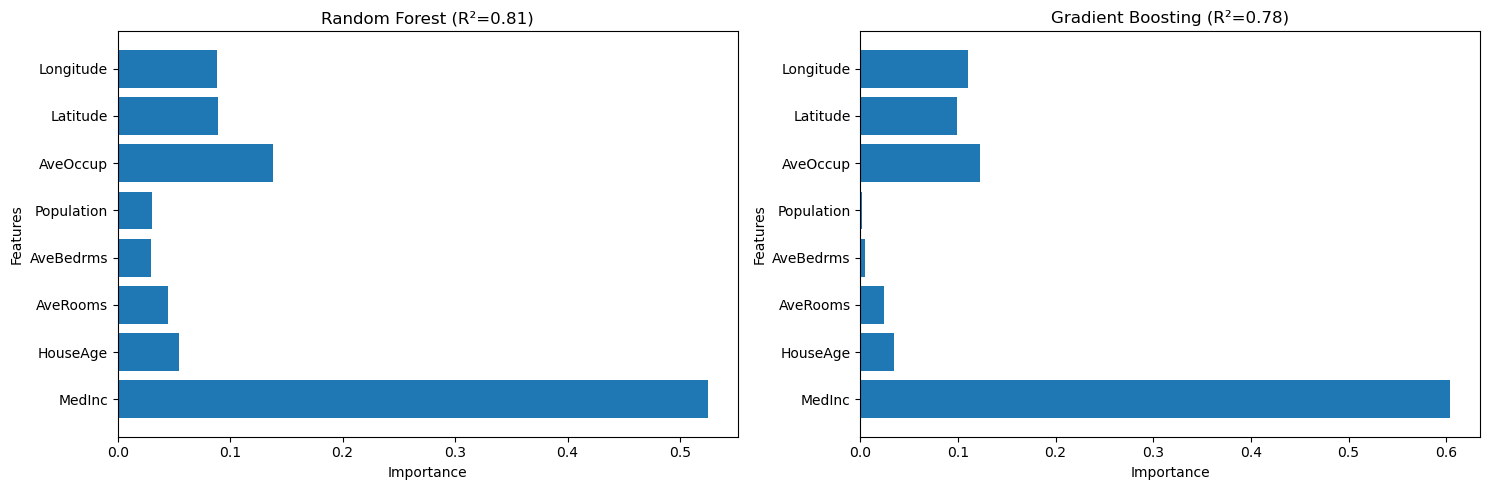

In [140]:
feature_names = X.columns

def analyze_feature_importance(models):
  fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))

  for ax, (name, model) in zip(axes, models.items()):
    feature_importances = model.feature_importances_
    score = r2_score(y_test, model.predict(X_test))

    ax.barh(np.arange(len(feature_importances)), feature_importances, align='center')
    ax.set_yticks(np.arange(len(feature_importances)))
    ax.set_yticklabels(feature_names)
    ax.set_title(f'{name} (R²={score:.2f})')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')

  plt.tight_layout()
  plt.show()

analyze_feature_importance(models)

feature_importances_rf = models["Random Forest"].feature_importances_
feature_importances_gb = models["Gradient Boosting"].feature_importances_


Наиболее важным признаком для обеих моделей является MedInc, что указывает на сильную корреляцию между доходом и стоимостью жилья. Признак AveOccup на втором месте в обеих моделях, Longitude и Latitude также играют важную роль, отражая влияние местоположения на цены. Потом идет HouseAge, ну и остальные признаки менее значимы. Порядок убывания важности признаков в моделях одинаков.

In [141]:
for name, model in models.items():
    print(feature_names)
    print(model.feature_importances_)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
[0.52487148 0.05459322 0.04427185 0.02960631 0.03064978 0.13844281
 0.08893574 0.08862881]
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
[0.60425868 0.0341128  0.02394789 0.00510559 0.00135359 0.12283524
 0.09853345 0.10985277]


### 6. Дополнительные задачи

In [27]:
# Проведите кросс-валидацию результатов.

def cross_validation(models):
    for name, model in models.items():
        
        # 5-кратная кросс-валидация на всем датасете
        cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        print(f'Среднее значение R^2 по 5-кратной кросс-валидации {name}: {cross_val_scores.mean().round(3)}')
        
        # 10-кратная кросс-валидация на всем датасете
        scores_10 = cross_val_score(model, X, y, cv=10, scoring='r2')
        print(f'Среднее значение R^2 при 10-кратной кросс-валидации: {name}, {scores_10.mean().round(3)}')


In [28]:
cross_validation(models)

Среднее значение R^2 по 5-кратной кросс-валидации Random Forest: 0.656
Среднее значение R^2 при 10-кратной кросс-валидации: Random Forest, 0.617
Среднее значение R^2 по 5-кратной кросс-валидации Gradient Boosting: 0.67
Среднее значение R^2 при 10-кратной кросс-валидации: Gradient Boosting, 0.626


С использованием кросс-валидации (5-кратной и 10-кратной) среднее значение снижается. Random Forest до 0.656 и 0.617 соответственно, Gradient Boosting до 0.67 и 0.626, что указывает на более реалистичные оценки производительности модели. Влияние 10-кратной кросс-валидации по сравнению с 5-кратной обычно заключается в более высокой надежности оценки, за счет увеличенного числа итераций и, как следствие, большей обобщающей способности. Повышение количества разбиений помогает достичь более стабильного и объективного результата за счет дополнительного уменьшения влияния специфики отдельных разделений данных на итоговую производительность модели.

In [151]:
from sklearn.feature_selection import RFE
# Создаем RFE модель и выбираем 7 признаков
for name, model in models.items():
    rfe = RFE(estimator=model, n_features_to_select=7)
    rfe = rfe.fit(X, y)
    
    # Показываем какие признаки выбраны
    print(name)
    selected_features = pd.DataFrame({
        'Feature': X.columns,  # Здесь X.columns должен содержать названия столбцов, использованных для X
        'Ranking': rfe.ranking_
    })
    print(selected_features.sort_values(by='Ranking', ascending=False))
    top_features = selected_features.sort_values(by='Ranking', ascending=False)[:8]
    X_train_selected = X_train[top_features.Feature]
    X_test_selected = X_test[top_features.Feature]

    # Обучение дерева решений на отобранных признаках
    dt = model
    dt.fit(X_train_selected, y_train)
    print(f'R^2 на тренировочных данных {r2_score(y_train, dt.predict(X_train_selected))}')
    print(f'R^2 на тестовых данных {r2_score(y_test, dt.predict(X_test_selected))} \n')
    

Random Forest
      Feature  Ranking
3   AveBedrms        2
0      MedInc        1
1    HouseAge        1
2    AveRooms        1
4  Population        1
5    AveOccup        1
6    Latitude        1
7   Longitude        1
R^2 на тренировочных данных 0.973552376450482
R^2 на тестовых данных 0.8038230406515305
Gradient Boosting
      Feature  Ranking
4  Population        2
0      MedInc        1
1    HouseAge        1
2    AveRooms        1
3   AveBedrms        1
5    AveOccup        1
6    Latitude        1
7   Longitude        1
R^2 на тренировочных данных 0.8048978817773166
R^2 на тестовых данных 0.7755824521517652


In [153]:
# Создаем RFE модель и выбираем 6 признаков
for name, model in models.items():
    rfe = RFE(estimator=model, n_features_to_select=6)
    rfe = rfe.fit(X, y)
    
    # Показываем какие признаки выбраны
    print(name)
    selected_features = pd.DataFrame({
        'Feature': X.columns,  # Здесь X.columns должен содержать названия столбцов, использованных для X
        'Ranking': rfe.ranking_
    })
    print(selected_features.sort_values(by='Ranking', ascending=False))
    top_features = selected_features.sort_values(by='Ranking', ascending=False)[:7]
    X_train_selected = X_train[top_features.Feature]
    X_test_selected = X_test[top_features.Feature]

    # Обучение дерева решений на отобранных признаках
    dt = model
    dt.fit(X_train_selected, y_train)
    print(f'R^2 на тренировочных данных {r2_score(y_train, dt.predict(X_train_selected))}')
    print(f'R^2 на тестовых данных {r2_score(y_test, dt.predict(X_test_selected))} \n')
    

Random Forest
      Feature  Ranking
3   AveBedrms        3
4  Population        2
0      MedInc        1
1    HouseAge        1
2    AveRooms        1
5    AveOccup        1
6    Latitude        1
7   Longitude        1
R^2 на тренировочных данных 0.963334529106748
R^2 на тестовых данных 0.7300327133504358 

Gradient Boosting
      Feature  Ranking
4  Population        3
3   AveBedrms        2
0      MedInc        1
1    HouseAge        1
2    AveRooms        1
5    AveOccup        1
6    Latitude        1
7   Longitude        1
R^2 на тренировочных данных 0.7457265954301137
R^2 на тестовых данных 0.707673303669061 



При уменьшении количества признаков не удалось достичь улучшения показателей модели. При 7 признаках показатели остаются практически прежними, при дальнейшем уменьшении количества признаков качество моделей падает.